In [93]:
import pickle
import pandas as pd

import sys, os
from pathlib import Path
# signalfuncなどのある親ディレクトリのパスを取得,これはJupyter系特有の書き方
current_dir = os.path.join(Path().resolve())
# モジュールのあるパスを追加
sys.path.append(str(current_dir) + '/../')

from sklearn.preprocessing import StandardScaler

import ml_modules as mm

In [94]:
df_train_data = pd.read_csv('../data/wine_train.csv')
df_train_data = pd.get_dummies(df_train_data)

x = df_train_data[list(set(df_train_data.columns)-set(['type_W','type_R','quality','quality_range']))]
# y = df_train_data['quality_range']
y = df_train_data['quality']

In [95]:
df = pd.read_csv('../data/wine_test.csv')

In [96]:
del df['type']

In [97]:
filename_voting = '../model/lda_rm_multico_voting_model.pickle'
filename_GBC = '../model/logloss_pca_rm_multico_GBC_model.pickle'

In [98]:
with open(filename_voting, mode='rb') as fp:
    voting = pickle.load(fp)

In [99]:
with open(filename_knn, mode='rb') as fp:
    gbc = pickle.load(fp)

In [100]:
X_test = pd.read_csv('../data/X_test.csv', header=0, index_col=0)
y_test = pd.read_csv('../data/y_test.csv',names=('l'))['l']
X_train = pd.read_csv('../data/X_train.csv', header=0, index_col=0)
y_train = pd.read_csv('../data/y_train.csv',names=('l'))['l']

In [101]:
X_test.drop(['total.sulfur.dioxide','residual.sugar'], axis=1, inplace=True) # alcholと相関が強いので除外してみる
X_train.drop(['total.sulfur.dioxide','residual.sugar'], axis=1, inplace=True)

Model Performance metrics:
------------------------------
Accuracy:  66.09% 
Precision: 67.93% 
Recall:    66.09% 
F1 Score:  64.46% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           6       0.63      0.76      0.69       473
           7       0.67      0.48      0.56       200
           5       0.70      0.74      0.71       351
           8       0.83      0.31      0.45        32
           4       1.00      0.05      0.10        38
           3       1.00      0.17      0.29         6
           9       0.00      0.00      0.00         0

   micro avg       0.66      0.66      0.66      1100
   macro avg       0.69      0.36      0.40      1100
weighted avg       0.68      0.66      0.64      1100


Prediction Confusion Matrix:
------------------------------
          Predicted:                      
                   6   7    5   8  4  3  9
Actual: 6        360  32   81   0  0  0  0
        7         

/Users/Zi/anaconda3/envs/jupyter-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Zi/anaconda3/envs/jupyter-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Users/Zi/codes/Practice-ML/wine_quality/notebook/../ml_modules/output_resulsts.py:109: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  columns=pd.MultiIndex(levels=[['Predicted:'], target_names], labels=level_labels),
/Users/Zi/codes/Practice-ML/wine_quality/notebook/../ml_modules/output_resulsts.py:110: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  index=pd.MultiIndex(levels=[['Actual:'], target_names], labels=leve

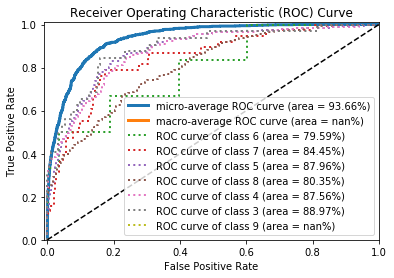

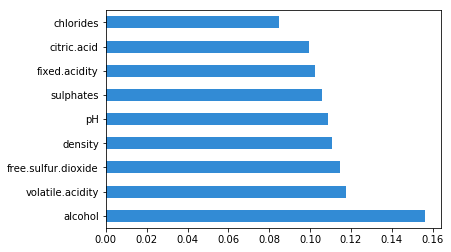

In [102]:
results = mm.get_results(voting
                         , 'voting', X_test, y_test, target_labels = y.unique(), target_names=[str(x) for x in y.unique()], reasume=True)

Model Performance metrics:
------------------------------
Accuracy:  65.27% 
Precision: 65.26% 
Recall:    65.27% 
F1 Score:  63.88% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           6       0.63      0.73      0.68       473
           7       0.67      0.55      0.60       200
           5       0.68      0.71      0.69       351
           8       0.73      0.34      0.47        32
           4       0.67      0.05      0.10        38
           3       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         0

   micro avg       0.65      0.65      0.65      1100
   macro avg       0.48      0.34      0.36      1100
weighted avg       0.65      0.65      0.64      1100


Prediction Confusion Matrix:
------------------------------
          Predicted:                       
                   6    7    5   8  4  3  9
Actual: 6        345   40   84   3  1  0  0
        7      

/Users/Zi/anaconda3/envs/jupyter-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Zi/anaconda3/envs/jupyter-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Zi/anaconda3/envs/jupyter-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Zi/anaconda3/envs/jupyter-env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samp

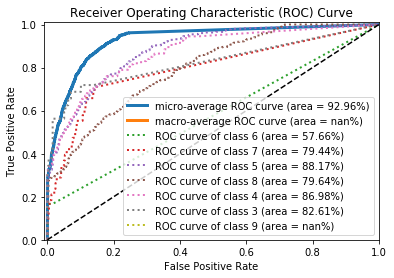

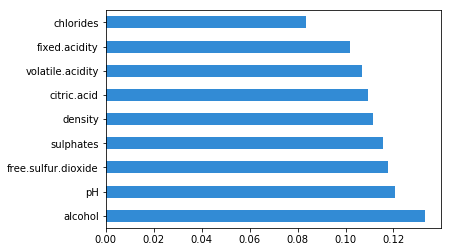

In [103]:
results = mm.get_results(gbc
                         , 'gbc', X_test, y_test, 
                         target_labels = y.unique(), 
                         target_names=[str(x) for x in y.unique()], 
                         results=results,
                         reasume=False)

In [104]:
results

,Prob,Accuracy,ROC AUC Score,ROC Area
voting,True,0.6609,0.729267,NaN
gbc,True,0.6527,0.725655,NaN


In [106]:
ss = StandardScaler()
df = pd.DataFrame(columns=df.columns,data=ss.fit_transform(df))

In [107]:
df.drop(['total.sulfur.dioxide','residual.sugar'], axis=1, inplace=True) # alcholと相関が強いので除外してみる

In [108]:
ans_gbc = pd.DataFrame(gbc.predict(df), columns=['predict'])

ans_review_gbc = pd.DataFrame(ans_gbc['predict'].value_counts())

ans_review_gbc['per'] = ans_review_gbc['predict'] / 1000

In [110]:
ans_review_gbc

,predict,per
6,519,0.519
5,425,0.425
7,55,0.055
4,1,0.001


In [111]:
ans_voting = pd.DataFrame(voting.predict(df), columns=['predict'])

ans_review_voting = pd.DataFrame(ans_voting['predict'].value_counts())

ans_review_voting['per'] = ans_review_voting['predict'] / 1000

In [112]:
ans_review_voting

,predict,per
6,600,0.600
5,389,0.389
7,8,0.008
8,1,0.001
4,1,0.001
3,1,0.001


In [68]:
base = pd.DataFrame(df_train_data['quality'].value_counts())

In [69]:
base['per']=base['quality']/len(df_train_data)

In [70]:
base

,quality,per
6,2410,0.438421
5,1793,0.326178
7,910,0.165545
4,184,0.033473
8,170,0.030926
3,25,0.004548
9,5,0.000910


In [88]:
est_di ={
    'voting':voting,
    'gbc':gbc
}